In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
data = pd.read_csv('train.csv')

Following pointers will be helpful to structure your findings.   

## 1.	Try and explore the data to check for missing values/erroneous entries and also comment on redundant features and add additional ones, if needed.

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210000 entries, 0 to 209999
Data columns (total 15 columns):
Age                        210000 non-null int64
Gender                     210000 non-null object
AppointmentRegistration    210000 non-null object
ApointmentData             210000 non-null object
DayOfTheWeek               210000 non-null object
Status                     210000 non-null object
Diabetes                   210000 non-null int64
Alcoolism                  210000 non-null int64
HiperTension               210000 non-null int64
Handcap                    210000 non-null int64
Smokes                     210000 non-null int64
Scholarship                210000 non-null int64
Tuberculosis               210000 non-null int64
Sms_Reminder               210000 non-null int64
AwaitingTime               210000 non-null int64
dtypes: int64(10), object(5)
memory usage: 24.0+ MB


## No Null Values

In [42]:
data.describe()

,Age,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
count,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000
mean,37.761824,0.077290,0.024676,0.214862,0.020471,0.052033,0.097738,0.000429,0.574238,-13.833538
std,22.794334,0.267052,0.155137,0.410727,0.155854,0.222095,0.296961,0.020698,0.499776,15.685272
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-398.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-20.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-8.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-4.000000
max,113.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.000000,-1.000000


In [43]:
data.columns

Index(['Age', 'Gender', 'AppointmentRegistration', 'ApointmentData',
       'DayOfTheWeek', 'Status', 'Diabetes', 'Alcoolism', 'HiperTension',
       'Handcap', 'Smokes', 'Scholarship', 'Tuberculosis', 'Sms_Reminder',
       'AwaitingTime'],
      dtype='object')

2.	It is immediately apparent that some of the column names have typos, so let us clear them up before continuing further, so that we don't have to use alternate spellings every time we need a variable. 

In [44]:
data.rename(columns = {'ApointmentData':'AppointmentData',
                         'Alcoolism': 'Alchoholism',
                         'HiperTension': 'Hypertension',
                         'Handcap': 'Handicap'}, inplace = True)

data.columns

Index(['Age', 'Gender', 'AppointmentRegistration', 'AppointmentData',
       'DayOfTheWeek', 'Status', 'Diabetes', 'Alchoholism', 'Hypertension',
       'Handicap', 'Smokes', 'Scholarship', 'Tuberculosis', 'Sms_Reminder',
       'AwaitingTime'],
      dtype='object')

3.	For convenience, convert the AppointmentRegistration and Appointment columns into datetime64 format and the AwaitingTime column into absolute values.

In [45]:
## convert the date time columns to datetime object
data.AppointmentRegistration = data.AppointmentRegistration.apply(np.datetime64)
data.AppointmentData = data.AppointmentData.apply(np.datetime64)
## awaiting time to absolute value
data.AwaitingTime = data.AwaitingTime.apply(abs)

4.	Create a new feature called HourOfTheDay, which will indicate the hour of the day at which the appointment was booked. 

In [46]:
def calculateHour(timestamp):
    timestamp = str(timestamp)
    hour = int(timestamp[11:13])
    minute = int(timestamp[14:16])
    second = int(timestamp[17:])
    return round(hour + minute/60 + second/3600)

In [47]:
data['HourOfTheDay'] = data.AppointmentRegistration.apply(calculateHour)

5.	Identify and remove outliers from Age. Explain using an appropriate plot.

In [48]:
data.Age.describe()

count    210000.000000
mean         37.761824
std          22.794334
min          -1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         113.000000
Name: Age, dtype: float64

In [49]:
## min = -2 and max = 113 seems outliers
## filter out data where age is less than 0 and more than 95
data = data[(data.Age >= 0)&(data.Age<=95)] 

In [50]:
data.Age.describe()

count    209862.000000
mean         37.723580
std          22.749823
min           0.000000
25%          19.000000
50%          38.000000
75%          56.000000
max          95.000000
Name: Age, dtype: float64

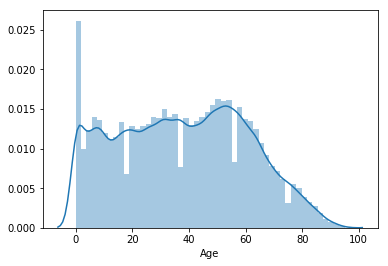

In [51]:
sns.distplot(data.Age)

6.	Analyse the probability of showing up with respect to different features. Create scatter plot and trend lines to analyse the relation between probability of showing up with respect to age/Houroftheday/awaitingtime. Describe your finding.

In [56]:
def probStatus(dataset, group_by):
    df = pd.crosstab(index = dataset[group_by], columns = dataset.Status).reset_index()
    df['probShowUp'] = df['Show-Up'] / (df['Show-Up'] + df['No-Show'])
    return df[[group_by, 'probShowUp']]


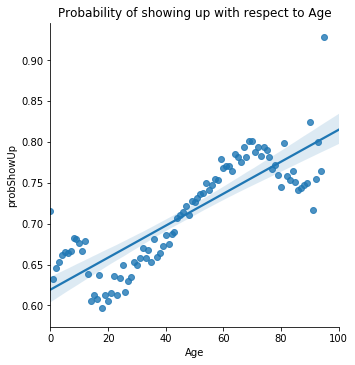

In [57]:
sns.lmplot(data = probStatus(data, 'Age'), x = 'Age', y = 'probShowUp', fit_reg = True)
plt.xlim(0, 100)
plt.title('Probability of showing up with respect to Age')
plt.show()

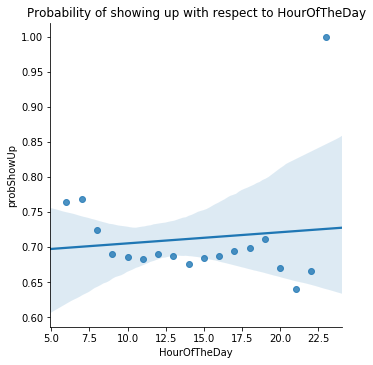

In [58]:
sns.lmplot(data = probStatus(data, 'HourOfTheDay'), x = 'HourOfTheDay', 
           y = 'probShowUp', fit_reg = True)
plt.title('Probability of showing up with respect to HourOfTheDay')
plt.show()

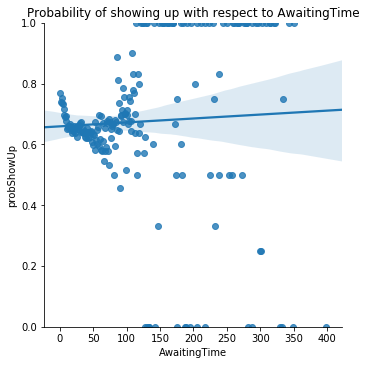

In [59]:
sns.lmplot(data = probStatus(data, 'AwaitingTime'), x = 'AwaitingTime', 
           y = 'probShowUp', fit_reg = True)
plt.title('Probability of showing up with respect to AwaitingTime')
plt.ylim(0, 1)
plt.show()

7.	Create a bar graph to depict probability of showing up for diabetes, alcoholism, hypertension, TB, smokes, scholarship.

In [67]:
def probStatusCategorical(group_by):
    rows = []
    for item in group_by:
        for level in data[item].unique():
            row = {'Condition': item}
            total = len(data[data[item] == level])
            n = len(data[(data[item] == level) & (data.Status == 'Show-Up')])
            row.update({'Level': level, 'Probability': n / total})
            rows.append(row)
    return pd.DataFrame(rows)

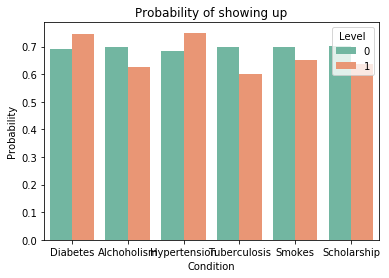

In [68]:
sns.barplot(data = probStatusCategorical(['Diabetes', 'Alchoholism', 'Hypertension',
                                         'Tuberculosis', 'Smokes', 'Scholarship']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')

plt.title('Probability of showing up')
plt.ylabel('Probability')
plt.show()

8.	Create separate bar graphs to show the probability of showing up for male and female, day of the week and sms reminder. Describe your interpretation. 

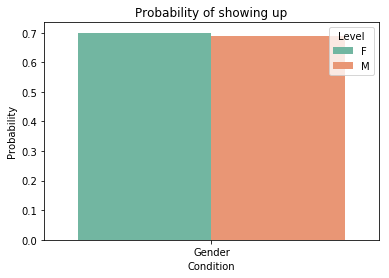

In [69]:
sns.barplot(data = probStatusCategorical(['Gender']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('Probability of showing up')
plt.ylabel('Probability')
plt.show()

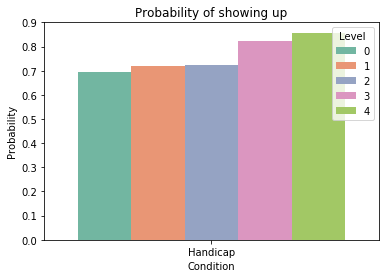

In [70]:
sns.barplot(data = probStatusCategorical(['Handicap']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('Probability of showing up')
plt.ylabel('Probability')
plt.show()

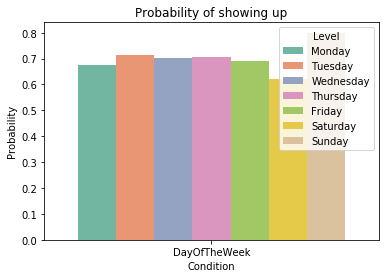

In [71]:
sns.barplot(data = probStatusCategorical(['DayOfTheWeek']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2',
           hue_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                       'Saturday', 'Sunday'])
plt.title('Probability of showing up')
plt.ylabel('Probability')
plt.show()

9.	Predict the Show-Up/No-Show status based on the features which show the most variation in probability of showing up. They are:

	Age
	Diabetes
	Alchoholism
	Hypertension
	Smokes
	Scholarship
	Tuberculosis

10.	Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business.